<a href="https://colab.research.google.com/github/arad1367/WAC_November-2023/blob/main/Session_6_Nov2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine learning with scikit-learn (Supervised learning: Regression)

- Regression problem
- scikit learn library
- Machine learning steps for regression problem

### What is regression problem?

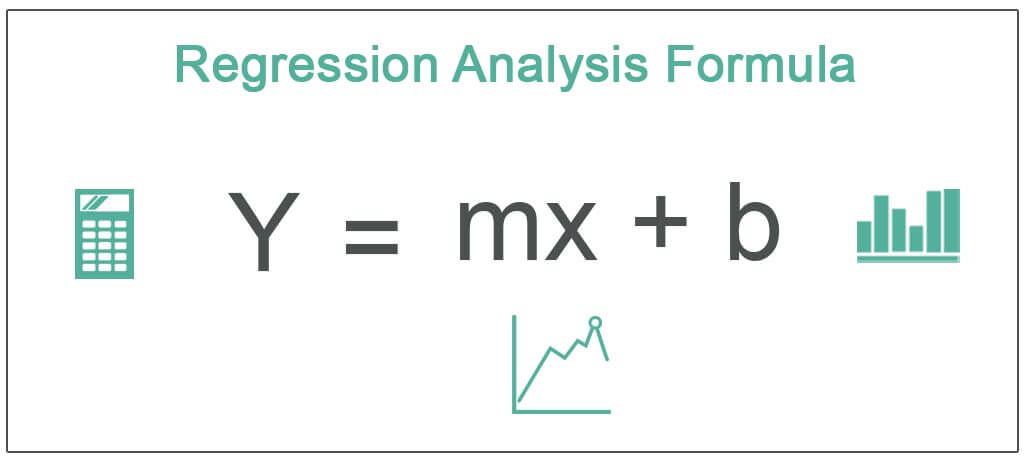

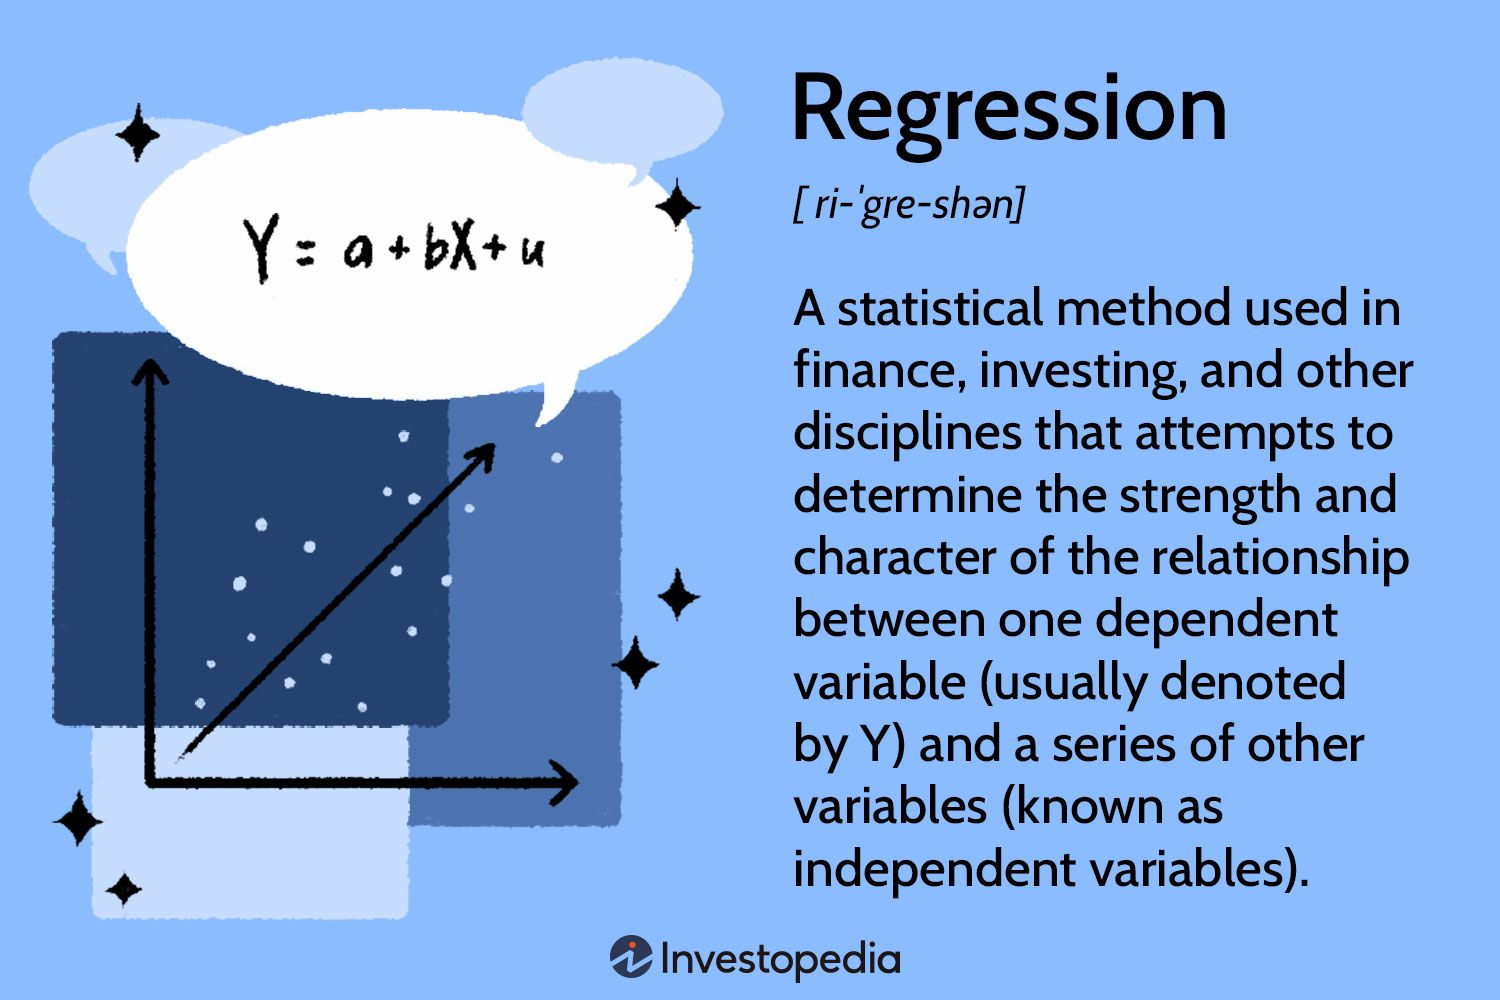

In [2]:
machine_learning_step = {1: "Get data ready",
                         2: "Data preprocessing",
                         3: "Features and target",
                         4: "Split data",
                         5: "Model",
                         6: "Fit the model with train data",
                         7: "Make prediction",
                         8: "Accuracy",
                         9: "Improvement with hyperparameters",
                         10: "Save the model"}

In [3]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

In [58]:
# All required libraries

import pandas as pd
import numpy as np
import pickle

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 1. Get data ready

In [6]:
california_data = fetch_california_housing()
california_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
df = pd.DataFrame(data=california_data['data'],
                  columns=california_data['feature_names'])
# We can see all features
df.head()

# We need target
df['target'] = california_data['target']

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.columns, len(df.columns)

(Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'target'],
       dtype='object'),
 9)

In [11]:
df.tail(4)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [12]:
# More information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 2. Data preprocessing

In [14]:
machine_learning_step[2]

'Data preprocessing'

In [15]:
# Check missing values
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

### 3. Features & Target

In [16]:
machine_learning_step[3]

'Features and target'

In [17]:
X = df.drop('target', axis=1)
y = df['target']

X[:5], y[:5]

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: target, dtype: float64)

In [18]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

### 4. Split data (train and test sets)

In [21]:
# Solution 1
# We want to divide our data 80% train --- 20% test
bound = int(0.8 * len(df))
X_train, y_train = X[:bound], y[:bound]
X_test, y_test = X[bound:], y[bound:]

len(X_train), len(y_train), len(X_test), len(y_test)

# Solution 2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(16512, 16512, 4128, 4128)

In [22]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

### Models (estimators)
link to select best estimators: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [24]:
models = {
    "SGD": SGDRegressor(),
    "RFR" : RandomForestRegressor(),
    "LR" : LinearRegression()
}

models

{'SGD': SGDRegressor(),
 'RFR': RandomForestRegressor(),
 'LR': LinearRegression()}

In [26]:
SGD_model = models['SGD']
SGD_model

# My model parameters
SGD_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [27]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

### 6. Fit the model with train data

In [28]:
SGD_model.fit(X_train, y_train)

SGDRegressor()

### 7. Make predictions

In [29]:
# We try to make some predictions and compare that with y_test == y_true
y_preds_sgd = SGD_model.predict(X_test)
y_preds_sgd[:10]

array([2.94674593e+14, 3.27060787e+14, 2.91222370e+14, 3.48003715e+14,
       2.39364475e+14, 4.69910364e+14, 1.69057834e+14, 2.31690995e+14,
       2.23356058e+14, 2.23324183e+14])

### 8. Accuracy
link to scikit-learn metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

In [30]:
# A simple way to calculate score (R2)
# In regression problem : score (R2) a statistical measure of how well the regression line approximates the actual data
SGD_model.score(X_test, y_test)

-9.971487831994238e+28

In [32]:
# We can write a function to calculate accuracy for regression problem
def accuracy_regression_problem(y_true, y_pred):
  """
  This function can calculate accuracy of regression models.
  Metrics: R2, mean squared error and mean absolute error.
  """
  r2 = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  return {
      'R2': r2,
      'MAE': mae,
      'MSE':mse
  }

In [33]:
SGD_accuracy = accuracy_regression_problem(y_true=y_test,
                                           y_pred=y_preds_sgd)
print(SGD_accuracy)

{'R2': -9.971487831994238e+28, 'MAE': 301525036859428.56, 'MSE': 1.3066727181465133e+29}


In [34]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

In [36]:
models

{'SGD': SGDRegressor(),
 'RFR': RandomForestRegressor(),
 'LR': LinearRegression()}

In [39]:
# X, y

# Split the data

# Make model
RFR_model = models['RFR']
RFR_model
RFR_model.get_params()

# Fit the model
RFR_model.fit(X_train, y_train)

# Make some predictions
y_preds_RFR = RFR_model.predict(X_test)

In [40]:
# Accuracy
RFR_accuracy = accuracy_regression_problem(y_true = y_test,
                                           y_pred = y_preds_RFR)

print(RFR_accuracy)

{'R2': 0.8055543157895405, 'MAE': 0.32787735620155056, 'MSE': 0.2548033703695809}


In [41]:
# With help of score
score_RFR = RFR_model.score(X_test, y_test)
print(f'R2 based on RandomForestRegressor: {score_RFR * 100:0.2f} %')

R2 based on RandomForestRegressor: 80.56 %


In [42]:
models

{'SGD': SGDRegressor(),
 'RFR': RandomForestRegressor(),
 'LR': LinearRegression()}

In [46]:
# Make the model
LR_model = models['LR']
LR_model
LR_model.get_params()

# Fit the model
LR_model.fit(X_train, y_train)

# Make predictions
y_preds_lr = LR_model.predict(X_test)

In [47]:
LR_accuracy = accuracy_regression_problem(y_true=y_test,
                                          y_pred=y_preds_lr)
print(LR_accuracy)

{'R2': 0.5757877060324508, 'MAE': 0.5332001304956553, 'MSE': 0.5558915986952444}


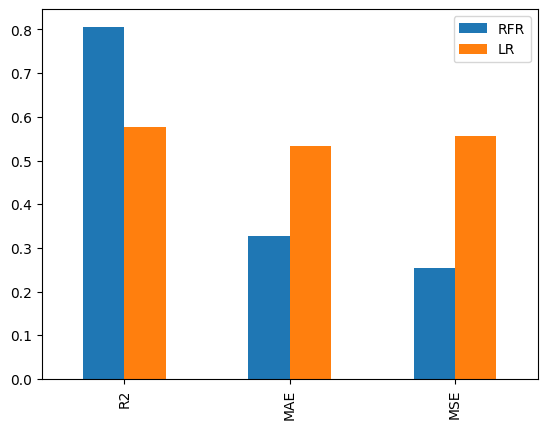

In [48]:
# Compare models with some graph
compare_models = pd.DataFrame(data={
    "RFR": RFR_accuracy,
    "LR": LR_accuracy
})

# Just Visualize that
compare_models.plot.bar();

In [49]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

### 9. Improvement with hyperparameters

In [50]:
RFR_accuracy

{'R2': 0.8055543157895405,
 'MAE': 0.32787735620155056,
 'MSE': 0.2548033703695809}

In [51]:
RFR_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [56]:
for i in range(10, 100, 10):
  # Use RandomForesrRegressor()
  model = RandomForestRegressor(n_estimators=i)
  model.fit(X_train, y_train)
  model_preds = model.predict(X_test)
  model_score = model.score(X_test, y_test)
  print(f"n_estimator: {i}  --- R2: {model_score * 100:0.2f} %")

n_estimator: 10  --- R2: 78.63 %
n_estimator: 20  --- R2: 79.62 %
n_estimator: 30  --- R2: 80.03 %
n_estimator: 40  --- R2: 80.49 %
n_estimator: 50  --- R2: 80.31 %
n_estimator: 60  --- R2: 80.58 %
n_estimator: 70  --- R2: 80.43 %
n_estimator: 80  --- R2: 80.52 %
n_estimator: 90  --- R2: 80.55 %


In [57]:
machine_learning_step

{1: 'Get data ready',
 2: 'Data preprocessing',
 3: 'Features and target',
 4: 'Split data',
 5: 'Model',
 6: 'Fit the model with train data',
 7: 'Make prediction',
 8: 'Accuracy',
 9: 'Improvement with hyperparameters',
 10: 'Save the model'}

### 10. Save and load our model

In [59]:
# pickle.dump to save a model
# pickle.load to load a model

pickle.dump(RFR_model, open("RFR_saved_model_california_dataset", "wb"))

### Load model and make predictions

In [60]:
RFR_loaded_model = pickle.load(open("RFR_saved_model_california_dataset", 'rb'))
RFR_loaded_model

RandomForestRegressor()

In [61]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
# Make prediction
RFR_loaded_model.predict([[7.9, 55.0, 3, 2, 1000, 3, 37.87, -122.33]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.9926728])